In [1]:
#Importing the used python packages 
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
#The packages are only used for task 7. (Sound files)
from scipy.io import wavfile
from scipy import signal
#The packages are only used for task 8. (HTML code scraping)
from bs4 import BeautifulSoup as bs
import re
import requests
import string

In [2]:
#Loading the images to an array for an easier usage
try:
    imageArray = [  Image.open('pic1.jpg'),
                    Image.open('pic2.jpg'),
                    Image.open('pic3.jpg'),
                    Image.open('pic4.jpg'),
                    Image.open('pic5.jpg')]
except IOError:
    print("Error, was unable to load images to imageArray")
    pass

In [3]:
#Function for calculating the average value (averageValue)
#and the distribution (szigmaValue) of the inputted 2 Dimensional array
def ave_szigValue(value2Darray):
    #Local variable for easier code
    sum = 0 
    #Nested for loops to iterate in the 2 Dimensional array 
    for rowIteration in value2Darray:
        for valueIteration in rowIteration:
            sum += valueIteration 
    #Average value calculation
    averageValue  = sum /( len(value2Darray)*len(value2Darray[0]))
    szigmaValue = 0
    
    #Nested for loops to iterate in the 2 Dimensional array 
    for rowIteration in value2Darray:
        for valueIteration in rowIteration:
            szigmaValue += pow(valueIteration-averageValue,2)
    #Distribution calculation        
    szigmaValue =pow( szigmaValue/( len(value2Darray)*len(value2Darray[0])-1),0.5)
    #Returning average value and distribution
    return averageValue, szigmaValue

In [4]:
#Function for calculating the average value and distribution for the 3 (Red,Green,Blue) chanels.
#The returned value are 2 1-dimensional array with 3 element 
def ave_szigRGBValue(value3Darray):
    #Using the previous function for calculating all the 3 chanels average and distribution values.
    avRed,   szRed   = ave_szigValue(value3Darray[0::,0::,0])
    avGreen, szGreen = ave_szigValue(value3Darray[0::,0::,1])
    avBlue,  szBlue  = ave_szigValue(value3Darray[0::,0::,2])
    #The output variables for more transparency in the code
    avRGB = [avRed,avGreen,avBlue]
    szRGB = [szRed,szGreen,szBlue]
    return avRGB,szRGB

In [5]:
#Function for standardizing the inputted 3 Dimensional array. 
def stdScaleImage(value3Darray):
    #Calculating the average value and the distribution array for the inputted data.
    averageRGB, szigmaRGB = ave_szigRGBValue(value3Darray)
    #Returning the standardized data
    return (value3Darray-averageRGB)/szigmaRGB

In [6]:
#Function for the task 5 and 6 so its easier to change the.
def task56(image):
    #The selected picture is shown.
    plt.imshow(image)
    plt.show()
    #The Numpy printoptions is set to NaN so it won`t cut our array, we can see all the elements.
    np.set_printoptions(threshold=np.nan)
    #Calculate all the variables, which we need to show
    imageNpArray  = np.array(image)
    imageAverageRGB, imageSzigmaRGB = ave_szigRGBValue(imageNpArray)
    standardArray = stdScaleImage(imageNpArray)
    #Printing the results
    print('Display of the images RGB chanels:\n',imageNpArray)
    print('The average value of the pixels per chanel\n',imageAverageRGB)
    print('The distribution value of the pixels per chanel\n',imageSzigmaRGB)
    print('The standardized (0 average, 1 distribution) array of the picture \n',standardArray)
    #Returning the results for further use
    return imageNpArray,imageAverageRGB,imageSzigmaRGB,standardArray

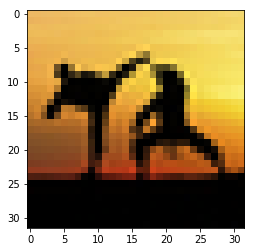

Display of the images RGB chanels:
 [[[237 185 101]
  [237 185  99]
  [236 186 101]
  [237 187 100]
  [238 187  98]
  [238 188  99]
  [239 189 100]
  [239 192 100]
  [240 194 100]
  [239 195 100]
  [239 192 100]
  [239 193  99]
  [239 195  98]
  [239 195  98]
  [239 195  98]
  [240 196  97]
  [240 196  97]
  [240 198  96]
  [241 199  97]
  [240 201  98]
  [243 201  99]
  [239 204 100]
  [241 204 100]
  [240 205 101]
  [240 205 101]
  [242 207 103]
  [242 209 104]
  [242 210 107]
  [244 213 107]
  [246 214 111]
  [244 215 113]
  [242 215 110]]

 [[234 178  93]
  [236 180  93]
  [236 182  94]
  [237 183  95]
  [238 184  94]
  [235 184  93]
  [237 186  94]
  [237 188  95]
  [238 189  94]
  [239 191  93]
  [240 192  92]
  [241 193  93]
  [239 194  93]
  [240 196  97]
  [240 199  93]
  [241 198  94]
  [241 200  94]
  [240 202  95]
  [241 200  94]
  [240 202  95]
  [241 203  96]
  [240 203  97]
  [241 204  98]
  [241 204  98]
  [240 205 101]
  [242 208 100]
  [243 211 102]
  [242 209 104]
  

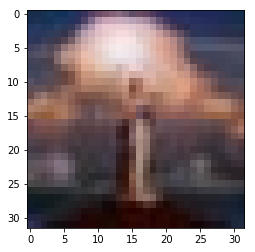

Display of the images RGB chanels:
 [[[ 25  44  74]
  [ 23  44  75]
  [ 23  50  80]
  [ 24  54  88]
  [ 17  49  87]
  [ 19  48  90]
  [ 30  53  97]
  [ 38  46  92]
  [ 56  51  92]
  [ 84  64 101]
  [107  77 105]
  [121  86 110]
  [133  98 120]
  [138 109 131]
  [121  97 121]
  [ 96  78 104]
  [105  75  99]
  [ 96  70  99]
  [ 78  58  93]
  [ 58  47  89]
  [ 46  44  91]
  [ 38  44  94]
  [ 35  45  94]
  [ 36  46  95]
  [ 31  41  90]
  [ 33  41  90]
  [ 33  41  90]
  [ 31  42  88]
  [ 29  42  86]
  [ 25  43  81]
  [ 21  44  76]
  [ 19  44  74]]

 [[ 25  45  80]
  [ 26  49  83]
  [ 23  47  81]
  [ 22  51  85]
  [ 27  55  92]
  [ 30  53  94]
  [ 35  50  91]
  [ 45  48  89]
  [ 76  66 101]
  [128 105 134]
  [178 146 169]
  [200 163 181]
  [202 168 184]
  [203 172 188]
  [197 170 187]
  [186 163 183]
  [181 152 170]
  [167 139 161]
  [137 113 139]
  [ 98  81 113]
  [ 68  58  95]
  [ 49  47  87]
  [ 44  47  90]
  [ 44  51  95]
  [ 39  47  93]
  [ 38  46  92]
  [ 36  44  90]
  [ 35  44  87]
  

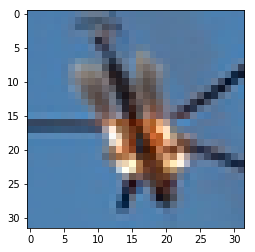

Display of the images RGB chanels:
 [[[ 77 125 173]
  [ 77 125 173]
  [ 77 125 174]
  [ 76 127 174]
  [ 75 126 173]
  [ 77 125 173]
  [ 81 124 169]
  [ 91 125 163]
  [ 99 125 152]
  [105 123 145]
  [104 122 144]
  [ 97 121 149]
  [ 66  99 134]
  [ 84 121 163]
  [ 82 121 164]
  [ 83 120 162]
  [ 80 122 160]
  [ 82 121 160]
  [ 83 121 158]
  [ 85 120 158]
  [ 85 121 157]
  [ 84 122 159]
  [ 84 122 159]
  [ 84 122 159]
  [ 83 125 165]
  [ 81 126 168]
  [ 77 128 173]
  [ 76 128 176]
  [ 76 128 176]
  [ 77 128 175]
  [ 78 126 174]
  [ 79 127 175]]

 [[ 76 127 174]
  [ 77 125 173]
  [ 78 126 174]
  [ 78 126 174]
  [ 76 124 173]
  [ 79 126 172]
  [ 83 122 165]
  [ 74 106 144]
  [ 69  96 125]
  [ 68  90 114]
  [ 67  85 105]
  [ 78  96 118]
  [ 82 103 132]
  [ 79 107 144]
  [ 88 121 162]
  [ 84 121 163]
  [ 84 122 159]
  [ 84 122 159]
  [ 83 121 160]
  [ 85 120 160]
  [ 85 120 158]
  [ 85 120 158]
  [ 86 122 158]
  [ 84 122 159]
  [ 84 123 164]
  [ 81 126 168]
  [ 80 127 173]
  [ 78 125 171]
  

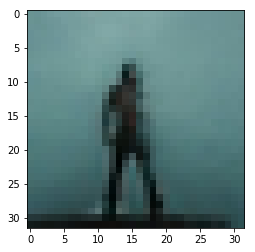

Display of the images RGB chanels:
 [[[106 148 147]
  [105 146 148]
  [108 149 151]
  [113 153 155]
  [116 156 158]
  [117 157 159]
  [117 157 157]
  [119 159 159]
  [125 161 161]
  [128 164 164]
  [127 163 161]
  [125 164 163]
  [125 164 163]
  [126 165 164]
  [128 167 166]
  [126 165 164]
  [126 165 164]
  [128 167 166]
  [127 166 165]
  [125 164 163]
  [122 160 161]
  [117 157 157]
  [115 155 157]
  [112 152 154]
  [110 150 152]
  [109 149 151]
  [109 149 151]
  [108 148 150]
  [107 147 149]
  [107 147 147]
  [106 146 146]
  [106 146 146]]

 [[106 148 147]
  [104 146 145]
  [107 148 150]
  [110 150 152]
  [111 151 153]
  [116 156 158]
  [117 157 157]
  [117 157 157]
  [121 160 159]
  [124 160 160]
  [125 164 163]
  [125 164 163]
  [126 165 164]
  [124 163 162]
  [125 164 163]
  [124 163 162]
  [125 164 161]
  [125 164 163]
  [126 165 164]
  [123 162 161]
  [119 159 158]
  [115 155 155]
  [113 153 153]
  [111 151 153]
  [109 149 151]
  [109 149 151]
  [109 149 151]
  [108 148 150]
  

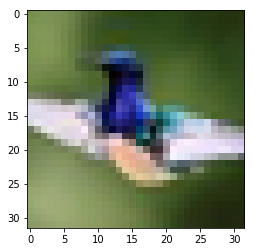

Display of the images RGB chanels:
 [[[117 142  76]
  [120 144  82]
  [125 146  87]
  [124 145  86]
  [122 144  82]
  [118 139  80]
  [110 131  75]
  [ 99 119  66]
  [ 86 104  54]
  [ 75  95  44]
  [ 68  88  39]
  [ 57  79  30]
  [ 54  77  23]
  [ 51  74  20]
  [ 47  71  19]
  [ 43  70  19]
  [ 45  68  24]
  [ 43  66  22]
  [ 41  67  20]
  [ 44  70  23]
  [ 43  69  22]
  [ 43  69  22]
  [ 43  66  22]
  [ 41  62  21]
  [ 38  59  20]
  [ 38  56  18]
  [ 38  56  18]
  [ 40  56  17]
  [ 37  51  15]
  [ 37  51  16]
  [ 37  51  16]
  [ 37  51  15]]

 [[120 145  77]
  [123 148  83]
  [125 147  85]
  [126 146  85]
  [123 143  82]
  [117 138  79]
  [108 129  73]
  [ 97 117  66]
  [ 82 102  53]
  [ 72  91  45]
  [ 61  84  40]
  [ 53  78  38]
  [ 47  74  39]
  [ 47  74  41]
  [ 47  73  36]
  [ 45  71  32]
  [ 45  71  26]
  [ 44  70  25]
  [ 43  70  25]
  [ 44  71  26]
  [ 45  71  24]
  [ 44  70  25]
  [ 44  67  25]
  [ 39  61  22]
  [ 37  58  19]
  [ 36  57  18]
  [ 38  56  18]
  [ 37  53  16]
  

The distribution value of the pixels per chanel
 [59.44065603216756, 51.7214533197241, 62.64267963772404]
The standardized (0 average, 1 distribution) array of the picture 
 [[[ 2.65003016e-01  5.14248045e-01 -1.61069798e-01]
  [ 3.15473522e-01  5.52916719e-01 -6.52884547e-02]
  [ 3.99591033e-01  5.91585392e-01  1.45293314e-02]
  [ 3.82767531e-01  5.72251055e-01 -1.43422584e-03]
  [ 3.49120526e-01  5.52916719e-01 -6.52884547e-02]
  [ 2.81826518e-01  4.56245034e-01 -9.72155691e-02]
  [ 1.47238502e-01  3.01570340e-01 -1.77033355e-01]
  [-3.78200213e-02  6.95582977e-02 -3.20705370e-01]
  [-2.56525548e-01 -2.20456755e-01 -5.12268056e-01]
  [-4.41584071e-01 -3.94465786e-01 -6.71903629e-01]
  [-5.59348586e-01 -5.29806144e-01 -7.51721415e-01]
  [-7.44407108e-01 -7.03815176e-01 -8.95393429e-01]
  [-7.94877615e-01 -7.42483849e-01 -1.00713833e+00]
  [-8.45348121e-01 -8.00486860e-01 -1.05502900e+00]
  [-9.12642129e-01 -8.58489870e-01 -1.07099256e+00]
  [-9.79936137e-01 -8.77824207e-01 -1.07099256

In [7]:
#The task 5 and 6 for all images
for image in imageArray:
    task56(image)

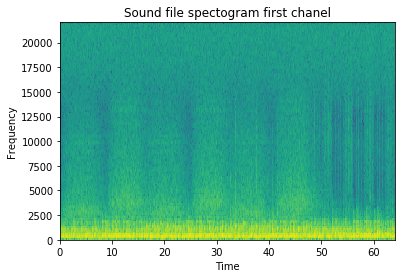

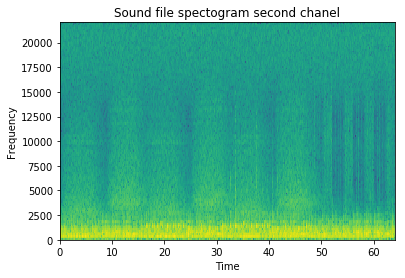

In [8]:
#Loading the sound file(sound.wav)
fs,data = wavfile.read('sound.wav')
#Because my choosen sound has 2 chanel I had to get the 2 data separated
data0 = data[:,0]
data1 = data[:,1]
#Using the buil-in function the spectogram calculated
frequencies, times, spectrogram = signal.spectrogram(data,fs,nperseg=1)

#Displaying the spectogram of the first chanel
plt.title("Sound file spectogram first chanel")
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.specgram(data0,Fs=fs)

#Displaying the spectogram of the second chanel
plt.show()
plt.title("Sound file spectogram second chanel")
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.specgram(data1,Fs=fs)


plt.show()

The text from the given url:
 
Did Facebook Shut Down an AI Experiment Because Chatbots Developed Their Own Language?
Facebook's artificial intelligence scientists were purportedly dismayed when the bots they created began conversing in their own private language.		
 
CLAIM
					Concerned artificial intelligence researchers hurriedly abandoned an experimental chatbot program after they realized that the bots were inventing their own language.									
RATING
False
ORIGIN
It is probably not a coincidence that two of the top-trending news stories of July 2017 were, in the first case, a warning from billionaire tech entrepreneur Elon Musk that artificial intelligence (AI) poses an “existential threat” to human civilization, and, in the second case, the announcement that an AI experiment sponsored by Facebook was, according to some sources, “shut down” after researchers discovered that the chatbots they programmed had begun communicating with one another in a private language of their own 

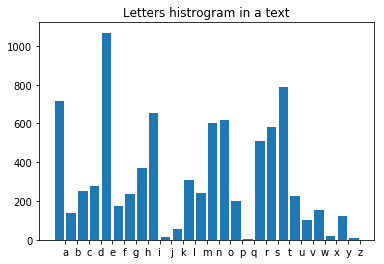

In [9]:
#Given url loading with request.get
page = requests.get('https://www.snopes.com/fact-check/facebook-ai-developed-own-language/')
data = page.text
#Converting the url to BeautifulSoup type for easier use
soup = bs(data)
text = []
#Finding all the article text.
for link in soup.find_all('article'):
    #Removing the datas which are not intelligent 
    [s.extract() for s in link('script')]
    #Linking the string togethet
    text.append(link.get_text())
#Loading the english alphabet
alphabet = list(string.ascii_lowercase)
charcount=[]
#Counting the number of each letters 
for char in alphabet:
    charcount.append((text[0].count(char)+text[0].count(char.upper())))
#Displaying the the text content of the url
print('The text from the given url:\n',re.sub(r'\n+','\n',text[0]))#re.sub is used for more visibility
#Displaying the histogram of all the letters
x = np.arange(len(alphabet))
plt.title("Letters histrogram in a text")
plt.bar(x, height= charcount)
plt.xticks(x+.5,alphabet);